In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the Wonderful Wines of the World data

data = pd.read_excel(r'C:\Users\frede\Documents\GitHub\BC1_GroupS\data\WonderfulWinesoftheWorld.xlsx')  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Kidhome      10001 non-null  float64
 6   Teenhome     10001 non-null  float64
 7   Freq         10001 non-null  float64
 8   Recency      10001 non-null  float64
 9   Monetary     10001 non-null  float64
 10  LTV          10001 non-null  float64
 11  Perdeal      10001 non-null  float64
 12  Dryred       10001 non-null  float64
 13  Sweetred     10001 non-null  float64
 14  Drywh        10001 non-null  float64
 15  Sweetwh      10001 non-null  float64
 16  Dessert      10001 non-null  float64
 17  Exotic       10001 non-null  float64
 18  WebPurchase  10001 non-null  float64
 19  WebV

In [4]:
data.head()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248


In [5]:
data.iloc[:,1:11].describe()

,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,898.102000,47.927300,16.739100,69904.358000,0.418800,0.469800,14.628100,62.406800,622.555200,209.071200
std,202.482664,17.301856,1.876281,27610.852665,0.493363,0.499087,11.968475,69.870762,647.102966,291.971441
min,550.000000,18.000000,12.000000,10000.000000,0.000000,0.000000,1.000000,0.000000,6.000000,-178.000000
25%,724.000000,33.000000,15.000000,47646.000000,0.000000,0.000000,4.000000,26.000000,63.000000,-2.000000
50%,894.000000,48.000000,17.000000,70009.000000,0.000000,0.000000,12.000000,52.000000,383.000000,57.000000
75%,1074.000000,63.000000,18.000000,92147.000000,1.000000,1.000000,24.000000,78.000000,1077.000000,364.000000
max,1250.000000,78.000000,20.000000,140628.000000,1.000000,1.000000,56.000000,549.000000,3052.000000,1791.000000


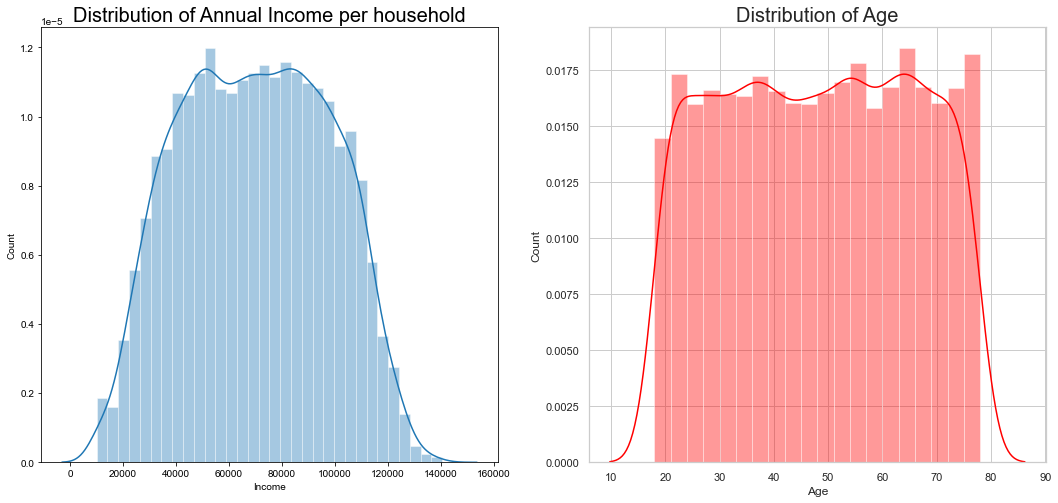

In [6]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Income'])
plt.title('Distribution of Annual Income per household', fontsize = 20)
plt.xlabel('Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], bins = 20,color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

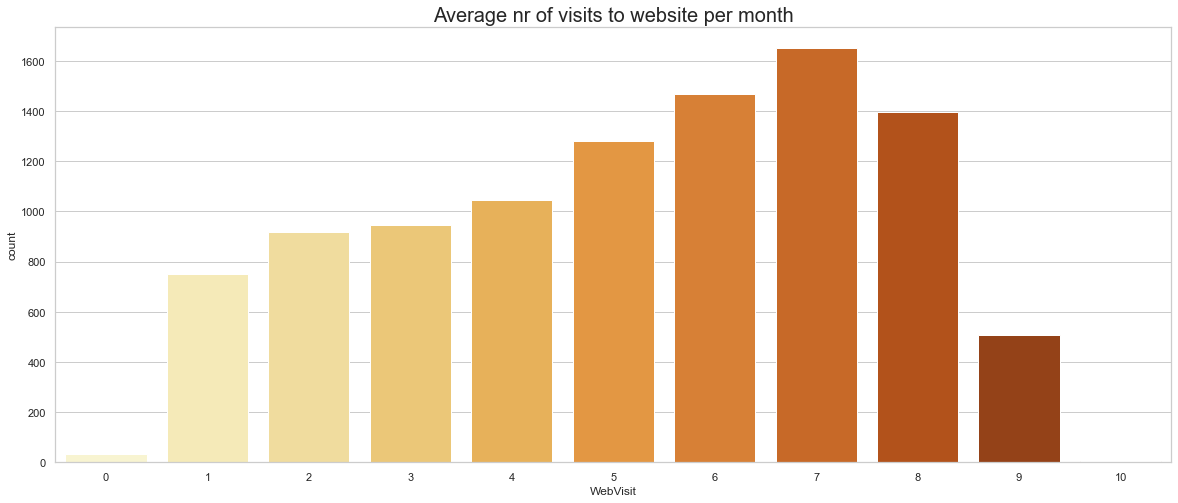

In [12]:
data['WebVisit'] = data['WebVisit'].astype(int)

plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['WebVisit'], palette = 'YlOrBr')
plt.title('Average nr of visits to website per month', fontsize = 20)
plt.show()

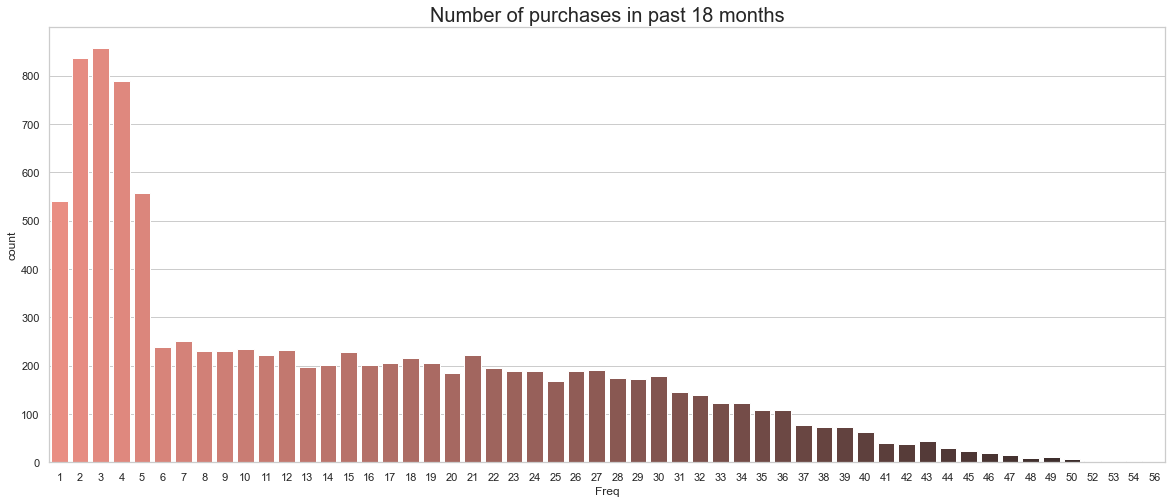

In [11]:
data['Freq'] = data['Freq'].astype(int)

plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Freq'], palette = 'dark:salmon_r')
plt.title('Number of purchases in past 18 months', fontsize = 20)
plt.show()

<AxesSubplot:>

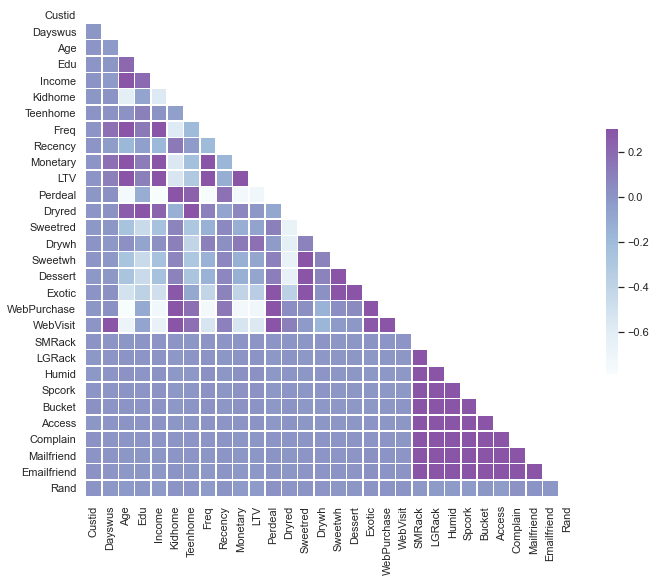

In [23]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("BuPu", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})